## Project 3 - Clustering
### Hotel customer segmentation
#### This notebook uses the dateset *HotelCustomersDataset.tsv*

### Dataset Description

| Variable             | Type       | Description                                                                                                                             |
|----------------------|------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| ID                   | Numeric    | Customer ID                                                                                                                             |
| Nationality          | Categorical| Country of origin. Categories are represented in the ISO 3155–3:2013 format                                                             |
| Age                  | Numeric    | Customer's age (in years) at the last day of the extraction period                                                                     |
| DaysSinceCreation    | Numeric    | Number of days since the customer record was created (number of days elapsed between the creation date and the last day of extraction) |
| NameHash             | Categorical| SHA2–256 hash-string of the customer's name.                                                                                            |
| DocIDHash            | Categorical| SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other)|
| AverageLeadTime      | Numeric    | The average number of days elapsed between the customer's booking date and arrival date.                                                 |
| LodgingRevenue       | Numeric    | Total amount spent on lodging expenses by the customer (in Euros). Includes room, crib, and other related lodging expenses              |
| OtherRevenue         | Numeric    | Total amount spent on other expenses by the customer (in Euros). Includes food, beverage, spa, and other expenses                        |
| BookingsCanceled     | Numeric    | Number of bookings made by the customer but subsequently canceled (the customer informed the hotel they would not come to stay)         |
| BookingsNoShowed     | Numeric    | Number of bookings made by the customer but subsequently marked as a “no-show” (the customer did not cancel but did not check-in)       |
| BookingsCheckedIn    | Numeric    | Number of bookings made by the customer that resulted in a stay                                                                         |
| PersonsNights        | Numeric    | The total number of persons/nights that the customer stayed at the hotel. Calculated by summing all customers' checked-in bookings’ persons/nights.   |
| RoomNights           | Numeric    | Total room/nights the customer stayed at the hotel (checked-in bookings). Calculated as the multiplication of the number of rooms of each booking by the number of nights of the booking |
| DaysSinceLastStay    | Numeric    | The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel |
| DaysSinceFirstStay   | Numeric    | The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel |
| DistributionChannel  | Categorical| Distribution channel usually used by the customer to make bookings at the hotel                                                         |
| MarketSegment        | Categorical| Current market segment of the customer                                                                                                  |
| SRHighFloor          | Boolean    | Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes)                                                   |
| SRLowFloor           | Boolean    | Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes)                                                    |
| SRAccessibleRoom     | Boolean    | Indication if the customer usually asks for an accessible room (0: No, 1: Yes)                                                          |
| SRMediumFloor        | Boolean    | Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes)                                                   |
| SRBathtub            | Boolean    | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)                                                       |
| SRShower             | Boolean    | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)                                                        |
| SRCrib               | Boolean    | Indication if the customer usually asks for a crib (0: No, 1: Yes)                                                                      |
| SRKingSizeBed        | Boolean    | Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes)                                                |
| SRTwinBed            | Boolean    | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)                                                      |
| SRNearElevator       | Boolean    | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)                                                   |
| SRAwayFromElevator   | Boolean    | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)                                               |
| SRNoAlcoholInMiniBar| Boolean    | Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes)                                     |
| SRQuietRoom          | Boolean    | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)                                                  |

For further details [original article](https://www.sciencedirect.com/science/article/pii/S2352340920314645)

- Antonio, N., de Almeida, A., & Nunes, L. (2020). A hotel's customers personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015–2018). Data in Brief, 33, 106583. https://doi.org/10.1016/j.dib.2020.106583. Retrieved from https://www.sciencedirect.com/science/article/pii/S2352340920314645

### **1. Business Understanding** <a id="1-business-understanding"></a>

##### **Overview**
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant.</p>

##### **Introduction**
<p>Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing. Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.</p>

##### **Customer segmentation in hotel H**
<p>Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one only customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.</p>

<p>Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers.</p>

##### **The challenge**
<p>Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database.</p>


##### **Questions or additional informations**
For any additional questions, don't hesitate to get in touch with one of the instructors. The instructors will also act as the hotel company/project stakeholder.

#### Import libraries <a id="11-import-libraries"></a>

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

# Data Preprocessing
from sklearn import preprocessing

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Dendogram
import riskfolio as rp

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Additional Utilities
import matplotlib.ticker as ticker

%matplotlib inline

# Ignore FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set seaborn style
sns.set_style("whitegrid")

# Set the max_columns option to None to display all columns
pd.set_option('display.max_columns', None)

#### Helper function

In [2]:
# WHY? The one_hot function performs one-hot encoding on a categorical column while grouping less frequent categories into a single "Other" category to reduce dimensionality
# Code is conducted from Prof. Nuno - Machine Learning in Marketing course 

def one_hot(s, threshold,prefix):
    """Do one-hot encoding for categories above a threshold and create a dummy column for all others named "Other"

    Args:
        s (series): series to apply the transformation
        threshold (numerical): threshold above which a dummy column should be created (from 0 to 1, corresponding from 0 to 100%)
        prefix (string): prefix to assign to the created columns

    Returns:
        dataframe: dataframe with the applied transformations
    """
    # Check dummies for the column
    d = pd.get_dummies(s)

    # Check if percentage is below threshold and act accordingly
    f = pd.Series.value_counts(s, sort=False, normalize=True) < threshold
    if f.sum() == 0:
        newSeries=d
    else:
        newSeries=d.loc[:, ~f].join(d.loc[:, f].sum(1).rename('Others'))
    # Add the prefix and return the result
    newSeries=newSeries.add_prefix(prefix)
    return newSeries

#### Load the data <a id="12-load-the-data"></a>

In [3]:
# Loading the dataset
ds = pd.read_csv('HotelCustomersDataset.tsv', sep='\t')

#### Dataset first look <a id="13-dataset-first-look"></a>

In [4]:
# Show top 5 rows
ds.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


At first glance, we can see that there are columns hashed `NameHash`, `DocIDHash` with respect to ethics statement:

- *Given that the hotel providing the data requested anonymity and due to the preservation of personal data, such as name, ID number and date of birth, every effort was made to anonymize or transform fields that directly or indirectly allowed identification of the hotel or the hotel's customers. Nevertheless, it was ensured that the data maintained its original properties, such as the existence of duplicates, outliers, missing values, among others. In this way, the authors guarantee the anonymity and privacy of the data, without influencing its quality for the appropriate types of use.*

Since they don't provide any useful information, we can drop them.

#### Number of entries, variables and data types <a id="14-number-of-entries-variables-and-data-types"></a>

In [5]:
# Check the number of entries and dtypes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

- There are 31 columns and 83590 entries.
- Only 'Age' column has missing values.
- Object columns(`Nationality`, `MarketSegment`, `DistributionChannel`) will be reformatted to categorical. The `NameHash` and `DocIDHash` variables, containing both numerical and string values, are therefore stored with the object data type.  We will not reformat them.

#### Feature categorization <a id="15-feature-categorization"></a>

In [6]:
# Define numerical variables
numerical_cols = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
                  'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                  'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
                  'DaysSinceFirstStay', 'DaysSinceCreation']

# Define categorical variables
categorical_cols = ['Nationality',
                    'DistributionChannel',
                    'MarketSegment']

# Define boolean variables
boolean_cols = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
                'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
                'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
                'SRQuietRoom']

- By organizing variables into categories, it becomes easier to apply specific data preprocessing steps or analysis techniques tailored to each variable type.

#### Reformat the variables <a id="16-reformat-variables"></a>

In [7]:
# Reformat the object variables to categorical type to facilitate data exploration and improve interpretability
ds['Nationality'] = ds['Nationality'].astype('category')
ds['DistributionChannel'] = ds['DistributionChannel'].astype('category')
ds['MarketSegment'] = ds['MarketSegment'].astype('category')

# Confirm the changes
print(ds[['Nationality', 'DistributionChannel', 'MarketSegment']].dtypes)

Nationality            category
DistributionChannel    category
MarketSegment          category
dtype: object


- Perfect! Reformatted correctly.

**What we have done? Why?**

These steps give us a solid start in working with our dataset. First, we bring in the necessary tools by importing libraries. Then, we load our data to get a feel for what we're working with. Checking out the first few rows helps us understand its layout. Next, we gather some basic info: how many entries we have, how many variables, and what types of data they hold. Organizing our features into categories like numerical, categorical, and boolean helps us see what kind of data we're dealing with. Lastly, we fine-tune our variables, like converting some to categorical types to make them easier to work with. Overall, these steps lay down a solid groundwork for digging into our data.

So far so good! We can move on data understanding phase!

### 2. Data Understanding <a id="2-data-understanding"></a>

#### Summary Statistics <a id="21-summary-statistics"></a>

In [8]:
# Summary statistics - NUMERICAL VARIABLES
# Transposition(T) refers swapping rows and columns. This format is easier to read
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.5,62692.750,83590.00
Age,79811.0,45.398028,16.572368,-11.0,34.00,46.0,57.000,122.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.0,723.000,1095.00
AverageLeadTime,83590.0,66.196028,87.758990,-1.0,0.00,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.0,6.000,116.00


*Based on the provided statistics*:

`Age`:

- The mean age is approximately 45 years.
- The age data contains erroneous values, as indicated by the minimum value of -11 years. Age cannot be negative, suggesting data entry or processing errors.
- The maximum age recorded is 122 years, which, while possible, is quite high.

`DaysSinceCreation`:

- On average, customer records were created approximately 453 days ago.
- The range spans from 0 to 1,095 days, indicating that the dataset covers customer records created within the last three years as it is described in the original article(2015–2018).

`AverageLeadTime`:

- The mean lead time is about 66 days.
- There are negative values in the lead time (minimum value of -1), which are not logical and indicate errors in the data.
- The maximum lead time is 588 days, suggesting some bookings were made well in advance.

*Revenue Columns*:

`LodgingRevenue`:
- Mean lodging revenue is approximately 298.80 Euros, with significant variability (standard deviation of 372.85 Euros).
- The maximum lodging revenue recorded is 21,781 Euros, indicating some customers have high expenditures.
- There is/are 0 value(s) in the column.

`OtherRevenue`:
- Mean other revenue is about 67.59 Euros, with a maximum of 7,730.25 Euros. This also shows substantial variability and the presence of high spenders.
- There is/are 0 value(s) in the column.

*Bookings*:

`BookingsCanceled` and `BookingsNoShowed`:
- Both have very low mean values (0.002 and 0.0006, respectively), indicating that cancellations and no-shows are rare.
- The maximum values are 9 for cancellations and 3 for no-shows, showing that while infrequent, some customers have multiple instances.

`BookingsCheckedIn`:
- The mean number of checked-in bookings is 0.79, with a maximum of 66. This indicates that while the majority of customers have less than one stay on average, there are some with numerous stays.

*Stay Details*:

`PersonsNights` and `RoomNights`:
- The average number of person nights is 4.65, and room nights is 2.36, indicating typical stay durations involve a few nights and multiple guests.
- The maximum values (116 person nights and 185 room nights) suggest some customers have very long stays or multiple rooms booked simultaneously.

`Days Since Last/First Stay`:
- The mean values for both metrics are around 401-403 days, with some values of -1 indicating that these customers have never stayed at the hotel.
- The maximum values are slightly over 1,000 days, suggesting that some customers' stays date back nearly three years.

`Special Requests (SR Columns)`:

- The frequency of special requests (like high floor, crib, quiet room, etc.) is generally low.
- The highest mean value among special requests is for SRKingSizeBed (0.35), suggesting this is the most common request.
- Most other requests have mean values close to zero, indicating they are rare.

*General Insights*:
- There are data quality issues that need addressing, such as negative ages and lead times.
- The dataset shows significant variability in customer behavior and spending, indicating a diverse customer base.

In [9]:
# Summary statistics - CATEGORICAL VARIABLES
# Transposition(T) refers swapping rows and columns. This format is easier to read
ds[categorical_cols].describe().T

,count,unique,top,freq
Nationality,83590,188,FRA,12422
DistributionChannel,83590,4,Travel Agent/Operator,68569
MarketSegment,83590,7,Other,48039


*Based on the provided statistics*:

`Nationality`:

- There are 188 unique nationalities represented in the dataset and the most frequent nationality is 'FRA' (France).

`DistributionChannel`:

- There are 4 unique distribution channels.
The most common distribution channel is 'Travel Agent/Operator'.

`MarketSegment`:

- There are 7 unique market segments.
The most frequent market segment is 'Other'.

#### Duplicate check <a id="22-duplicate-check"></a>

In [10]:
# Duplicate check
print("Number of duplicated rows:", ds.duplicated().sum())

Number of duplicated rows: 0


#### Unique values for each column <a id="24-unique-values"></a>

In [11]:
# Check the number of unique values for each column
unique_counts = ds.nunique().to_frame("Number of unique values")
unique_counts

,Number of unique values
ID,83590
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,80642
DocIDHash,76993
AverageLeadTime,418
LodgingRevenue,10257
OtherRevenue,4490
BookingsCanceled,6


#### Check unique values for each column

In [12]:
# Check unique values for each column
for col in ds.columns:
  print(f"Column: {col}")
  print(ds[col].unique())
  print()  # Add a space between the outputs    # Click the text editor below to check all unique values (VSCode)

Column: ID
[    1     2     3 ... 83588 83589 83590]

Column: Nationality
['PRT', 'DEU', 'FRA', 'JPN', 'IRL', ..., 'FJI', 'TON', 'TCD', 'YEM', 'NPL']
Length: 188
Categories (188, object): ['ABW', 'AGO', 'AIA', 'ALB', ..., 'WSM', 'YEM', 'ZAF', 'ZWE']

Column: Age
[ 51.  nan  31.  60.  54.  49.  32.  42.  25.  27.  58.  56.  57.  68.
  72.  71.  24.  26.  50.  52.  36.  64.  65.  47.  67.  39.  41.  43.
   3.  63.  30.  28.  18.  53.  48.  17.  38.  40.  59.  13.  61.  69.
  55.  70.  34.  66.  82.  35.   6.  62.  45.  37.  29.  10.   8.   7.
   4.  44.   9.  33.   5.  46.  20.  14.  74.  11.  73.   1.  22.  19.
  78.  77.  21.  76.  75.  15.  83.  12.  23.  80.  79.  16.  -7.  81.
 114.  84.  -9.  85.  87. -11.  89.  91.  88.  86. -10.  -6.  -1. 110.
   2.  92. 113.  90.   0. 122.  96. 109.]

Column: DaysSinceCreation
[ 150 1095 1094 ...    2    1    0]

Column: NameHash
['0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375716EB065E29697CC071E'
 '0x21EDE41906B45079E75385B5AA33287CA09DE1AB86D

#### Missing values 

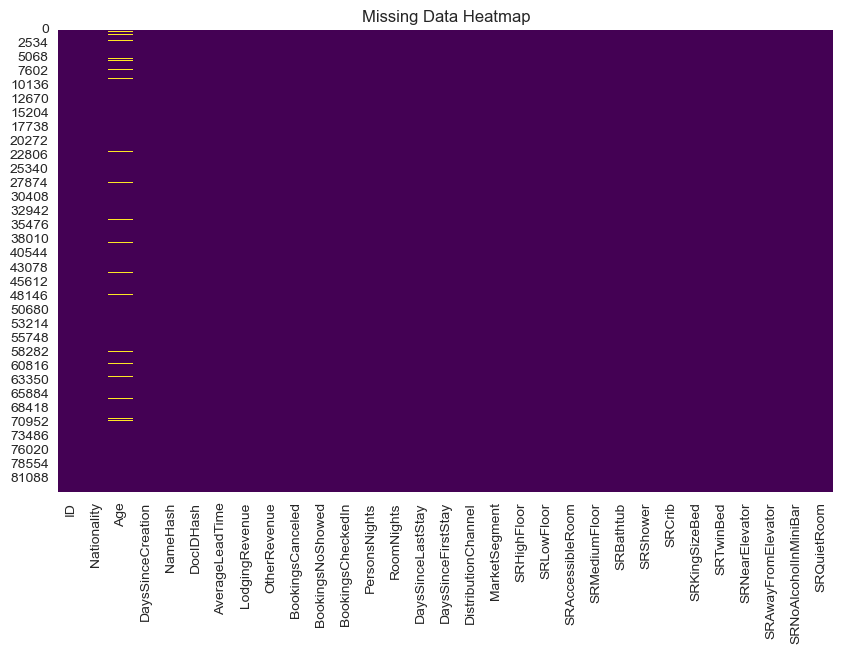

In [13]:
# Heatmap for missing values using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(ds.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

- Heatmaps help identify systematic missing values, such as entire columns with high percentages of missing data or specific rows where multiple fields are missing. This can indicate problems in data collection or specific issues with certain data points.
- As we have observed before, only the `Age` column has missing values.

Let's check the percentage of missing values.

In [14]:
# Check the percentage of missing values in 'Age' column
missing_data = pd.DataFrame({'Count': ds.isnull().sum(), 'Percentage': (ds.isnull().mean() * 100)})
missing_data.sort_values(by='Percentage', ascending=False).head(1)

,Count,Percentage
Age,3779,4.520876


- The `Age` column has 3779 missing values, which accounts for approximately 4.52% of the total dataset. Removing this percentage of data may affect the analysis. Imputation will be considered.

#### Data quality assessment for each column

Assessing data quality in clustering is crucial because it ensures accurate and meaningful cluster formation. High-quality data leads to reliable results, while poor-quality data can introduce noise and biases, affecting the interpretability and trustworthiness of the clusters.

#### '`Age`'

In [15]:
# Check the number of negative values in 'Age' column
print("Total number of values under 0 in the 'Age' column:", (ds['Age'] < 0).sum())

Total number of values under 0 in the 'Age' column: 17


- Amazing! Encountered an error as soon as we started :) Age values can not be negative. These data errors will be removed. 

#### '`DaysSinceCreation`'

In [16]:
# Check inactive customers who have not checked in within three years
for years in range(1, 4):
    duration_days = years * 365
    count = ds[(ds['DaysSinceCreation'] >= duration_days) & (ds['BookingsCheckedIn'] == 0)].shape[0]
    print(f"The number of people who never checked in but have a profile for more than {years} year(s) is: {count}")

The number of people who never checked in but have a profile for more than 1 year(s) is: 1062
The number of people who never checked in but have a profile for more than 2 year(s) is: 1062
The number of people who never checked in but have a profile for more than 3 year(s) is: 28


- We have also inactive customers who have not checkedin in within three years (2015-2018).  

#### '`NameHash`' and '`DocIDHash`'

In [17]:
# Check whether the customer hashed ID and DocID is unique
print("Number of unique IDs:", len(ds['ID'].unique()))
print("Number of unique hashed names:", len(ds['NameHash'].unique()))
print("Number of unique hashed DocID:", len(ds['DocIDHash'].unique()))

Number of unique IDs: 83590
Number of unique hashed names: 80642
Number of unique hashed DocID: 76993


*Observations on Unique `IDs`, `NameHash`, and `DocIDHash`*:

- **Number of Unique IDs**: There are 83,590 unique customer IDs in the dataset, ranging from 1 to 83,590.

- **Number of Unique Hashed Names**: Among the customers, there are 80,642 unique hashed names. However, some duplicates are present, indicating potential issues during data integration or transformation.

- **Number of Unique Hashed DocIDs**: Similarly, there are 76,993 unique hashed document IDs in the dataset. Like the hashed names, there are instances of duplicates, suggesting data integrity concerns.

*Explanation*:

- **Duplicate Hashed Names (NameHash)**: The presence of duplicate hash names can be caused by multiple customers sharing the same name or using different documents for bookings. This is particularly plausible where names are common or customers provide alternative identification.

- **Duplicate Hashed Document IDs (DocIDHash)**: Similarly, duplicate hashed document IDs may result from the use of a company-wide identification code instead of individual-specific codes. In such scenarios, multiple customers may be assigned the same hashed document ID.

*Verification*:

- To validate these observations, it's essential to examine rows where both the `NameHash` and `DocIDHash` are identical and duplicated. This verification step will help confirm the presence of duplicate hashed names and hashed document IDs, providing insight into potential data quality issues that may require further investigation.

In [18]:
# Calculate the number of rows where the combination of `NameHash` and `DocIDHash` is duplicated
num_duplicates = ds.duplicated(subset=['NameHash', 'DocIDHash'], keep=False).sum()

# Calculate the total number of rows in the dataset
total_rows = len(ds)

# Calculate the duplicated percentage
duplicated_percentage = (num_duplicates / total_rows) * 100

# Display the total number of duplicates and duplicated percentage
print("Total number of duplicates:", num_duplicates)
print(f"Duplicated percentage: {duplicated_percentage:.2f}%")

Total number of duplicates: 4237
Duplicated percentage: 5.07%


- There are 4237 rows where the combination of `NameHash` and `DocIDHash` is duplicated. Since this duplication is likely due to a data transformation error, we will proceed by removing these rows.

#### '`AverageLeadTime`'

In [19]:
# Check the number of negative values in 'AverageLeadTime'
print("Total number of values under 0 in the 'AverageLeadTime' column:", (ds['AverageLeadTime'] < 0).sum())

Total number of values under 0 in the 'AverageLeadTime' column: 10


- Perfect! Since the number of negative values are very small, we can remove them.

#### '`LodgingRevenue`' and '`OtherRevenue`'

In [20]:
# Check the customers with zero revenue despite checking in
checkedIn_zero_revenue = ds[(ds['BookingsCheckedIn'] > 0) & (ds['LodgingRevenue'] == 0) & (ds['OtherRevenue'] == 0)]
print(f"Number of customers who checked in but have zero total revenue: {len(checkedIn_zero_revenue)}")
print(f"Percentage of customers with checkedIn and zero total revenue: {len(checkedIn_zero_revenue) / ds.shape[0] * 100:.2f}%")

Number of customers who checked in but have zero total revenue: 285
Percentage of customers with checkedIn and zero total revenue: 0.34%


In [21]:
# Check the customers with no-checkins and zero revenue
no_checkedIn_zero_revenue = ds[(ds['BookingsCheckedIn'] == 0) & (ds['LodgingRevenue'] == 0) & (ds['OtherRevenue']== 0)]
print(f"Number of customers with no checkedIn and have zero total revenue: {len(no_checkedIn_zero_revenue)}")
print(f"Percentage of customers with no checkedIn and zero total revenue: {len(no_checkedIn_zero_revenue) / ds.shape[0] * 100:.2f}%")

Number of customers with no checkedIn and have zero total revenue: 19920
Percentage of customers with no checkedIn and zero total revenue: 23.83%


- There are 285 (0.34% of the dataset) customers that stayed in the hotel but didn't spend anything. Customers checking in but generating zero total revenue can be attributed to various factors such as promotional stays, compensation, membership benefit or booking errors. We will exclude these customers to increase data quality and reduce noise.
- Also, there are 19920 (23.83% of the dataset) customers that didn't checkedIn and total revenue is 0.

We think that customers with no checkedIn, or checkedIn but didn't spend anything does not provide a useful information. We will remove the corresponding customers.

#### '`BookingsCanceled`', '`BookingsNoShowed`' and '`BookingsCheckedIn`'

In [22]:
# Check the the columns 'BookingsCanceled', 'BookingsNoShowed' and 'BookingsCheckedIn' for the elimination of unimportant variables
print(ds['BookingsCanceled'].value_counts())
print(ds['BookingsNoShowed'].value_counts())
print(ds['BookingsCheckedIn'].value_counts().head())

BookingsCanceled
0    83472
1       92
2       12
3        8
4        5
9        1
Name: count, dtype: int64
BookingsNoShowed
0    83546
1       36
2        7
3        1
Name: count, dtype: int64
BookingsCheckedIn
1    62215
0    19920
2     1147
3      132
4       59
Name: count, dtype: int64


- `BookingsCanceled` and `BookingsNoShowed` variables are highly imbalanced and does not provide variance. They will be dropped.

- On the other hand, `BookingsCheckedIn` shows little variance. 

#### '`PersonsNight`' and '`RoomNight`'

In [23]:
# Print the value counts and sort them in descending order for the 'PersonsNights' and 'RoomNights' variables
print(ds['PersonsNights'].value_counts().sort_values(ascending=False).head())
print(ds['RoomNights'].value_counts().sort_values(ascending=False).head())

PersonsNights
0    19922
6    13704
4    10418
2     9628
8     8249
Name: count, dtype: int64
RoomNights
0    19920
3    17149
2    14115
1    11381
4    11158
Name: count, dtype: int64


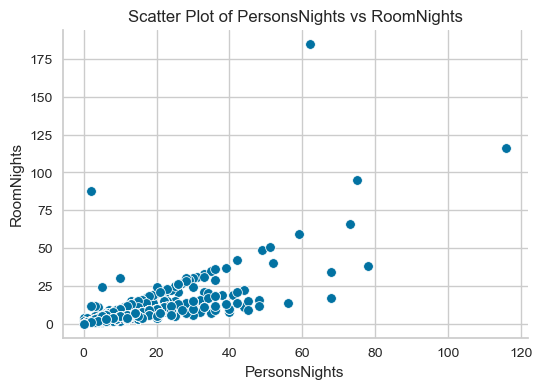

In [24]:
# Check the relation between 'PersonsNight' and 'RoomNight' with scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=ds, x='PersonsNights', y='RoomNights')
plt.title('Scatter Plot of PersonsNights vs RoomNights')
sns.despine()
plt.show()

- As we observed in summary statistics, there is a typical stay durations involve a few nights and multiple guests. Scatter plot shows that there is a linear relationship between the two variables. As the number of persons/nights increases, the total room/nights also tend to increase, indicating a positive correlation between the two variables. We will also check the pearson correlation in the following parts.

#### '`DaysSinceFirstStay`' and '`DaysSinceLastStay`'

In [25]:
# Print the value counts and sort them in descending order for the 'DaysSinceFirstStay' and 'DaysSinceLastStay' variables
print(ds['DaysSinceFirstStay'].value_counts().sort_values(ascending=False).head())
print(ds['DaysSinceLastStay'].value_counts().sort_values(ascending=False).head())

DaysSinceFirstStay
-1      19920
 920      203
 472      203
 477      161
 938      157
Name: count, dtype: int64
DaysSinceLastStay
-1      19920
 920      203
 472      196
 477      165
 938      158
Name: count, dtype: int64


- As in `LodginRevenue` and `OtherRevenue` data quality control, the number of customers 19920 (23.83% of the dataset) who did not spend at all is the same as the number of customers who do not stay at the hotel (If the customer didn't stay at the hotel `DaysSinceFirstStay` and `DaysSinceLastStay` are -1). There should be a high correlation between these columns. If this is the case we will drop one of them to reduce redundancy.

#### '`Special Requests variables (SR)`'

In [26]:
# Check the variance for each special request variable
ds[boolean_cols].apply(pd.Series.value_counts)

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,79621,83472,83569,83517,83352,83447,82485,54109,71675,83562,83297,83580,76203
1,3969,118,21,73,238,143,1105,29481,11915,28,293,10,7387


- Seems only  `SRKingSizeBed`, `SRTwinBed` has variance but it is still low. We will keep these 2 columns and drop the others that does not provide valuable information for the analysis. But before dropping the columns let's sum special requests and see the distribution.

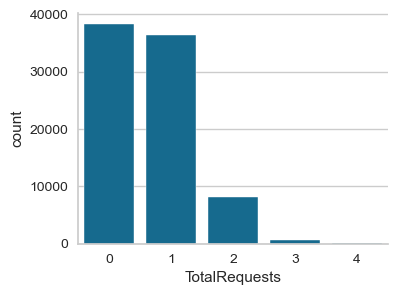

In [27]:
# Sum SR columns and create a new variable: 'TotalRequests'
total_request_ds = ds[boolean_cols].copy()
total_request_ds['TotalRequests'] = total_request_ds[boolean_cols].sum(axis=1)

# Plot the distribution of 'TotalRequests'
plt.figure(figsize=(4, 3))
sns.countplot(x='TotalRequests', data=total_request_ds)
sns.despine()
plt.show()

- As we can see, there are also customers request more than one. However, the variance is still low. We will only keep `SRKingSizeBed` and `SRTwinBed`columns to reduce redundancy.  

#### '`Distribution Channel`'

In [28]:
# Check the relation between 'DistributionChannel' and Revenue
ds.groupby('DistributionChannel', observed=True)[['LodgingRevenue', 'OtherRevenue']].sum()

,LodgingRevenue,OtherRevenue
DistributionChannel,,
Corporate,848578.46,174009.48
Direct,3607374.43,787268.33
Electronic Distribution,145297.49,17109.86
Travel Agent/Operator,20375616.08,4671387.86


*Findings:*

- The Travel Agent/Operator channel is the top earner, making the most money.
- Direct bookings also bring in a lot of money.
- Corporate bookings contribute a steady but smaller amount.
- Online bookings (Electronic Distribution) generate the least revenue.

#### '`MarketSegment`'

In [29]:
# Check the relation between 'MarketSegment' and Revenue
ds.groupby('MarketSegment', observed=True)[['LodgingRevenue', 'OtherRevenue']].sum()

,LodgingRevenue,OtherRevenue
MarketSegment,,
Aviation,130292.35,19725.85
Complementary,11633.26,8565.29
Corporate,674244.74,141238.87
Direct,3629166.33,789612.15
Groups,2635631.19,610277.77
Other,15220011.29,3206349.28
Travel Agent/Operator,2675887.30,874006.32


*Findings:*

- The Other segment generates the highest revenue, both in lodging and other services.
- The Direct and Groups segments also make significant contributions to revenue.
- The Corporate segment provides a moderate amount of income.
- The Aviation and Complementary segments contribute the least to total revenue

In [30]:
# Cross tabulation between 'DistributionChannel' and 'MarketSegment'
cat_cross_table = pd.crosstab(index=ds['DistributionChannel'], columns=ds['MarketSegment'])
cat_cross_table

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
DistributionChannel,,,,,,,
Corporate,239,14,1724,14,478,34,97
Direct,0,393,46,11219,134,96,24
Electronic Distribution,0,0,2,5,1,496,5
Travel Agent/Operator,5,103,397,219,8888,47413,11544


*Findings:*

**Corporate Channel**:

- Mainly used for Corporate bookings (1,724).
- Other notable segments: Aviation (239) and Groups (478).

**Direct Channel**:

- Predominantly for Direct bookings (11,219).
- Also significant in the Complementary segment (393).

**Electronic Distribution Channel**:

- Primarily used for Other bookings (496).
- Minimal usage across other segments.

**Travel Agent/Operator Channel**:

- Dominated by Travel Agent/Operator bookings (11,544).
- Significant in the Groups segment (8,888) and Other segment (47,413).

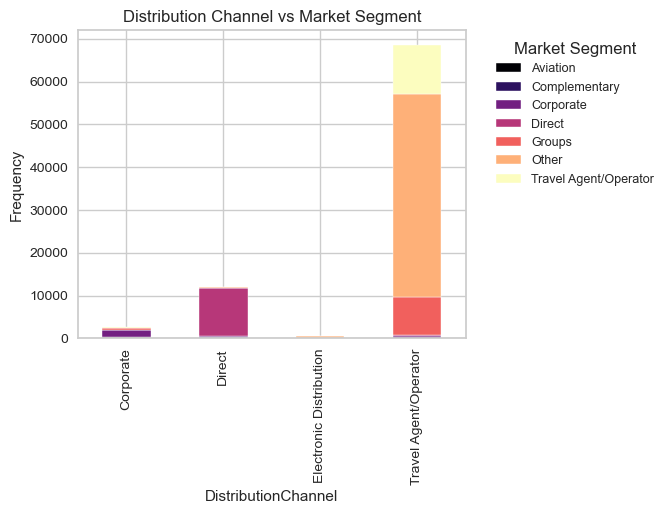

In [31]:
# Plot the cross-tabulation using a stacked bar plot with color
cat_cross_table.plot(kind='bar', stacked=True, figsize=(5, 4), colormap='magma')
plt.title('Distribution Channel vs Market Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Market Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.show()

- Since the new marketing manager, A, wants to create a new segmentation for the `MarketSegment` variable. We can dropped the column since it is out of date and useless.

**What we have done? Why?**

In this phase of Data Understanding, we've conducted crucial analyses and checks to comprehensively grasp our dataset. We started by calculating summary statistics, providing insights into the distribution and variability of our data. Then, we performed a duplicate check to ensure data integrity, followed by examining missing values to address data incompleteness effectively. We explored unique values in each column and understand the quality and diversity of the variables. These steps lay a solid foundation for subsequent analyses, ensuring reliability and validity in our conclusions.

### 3. Data Exploration <a id="3-data-exploration"></a>

#### Distribution of numerical variables

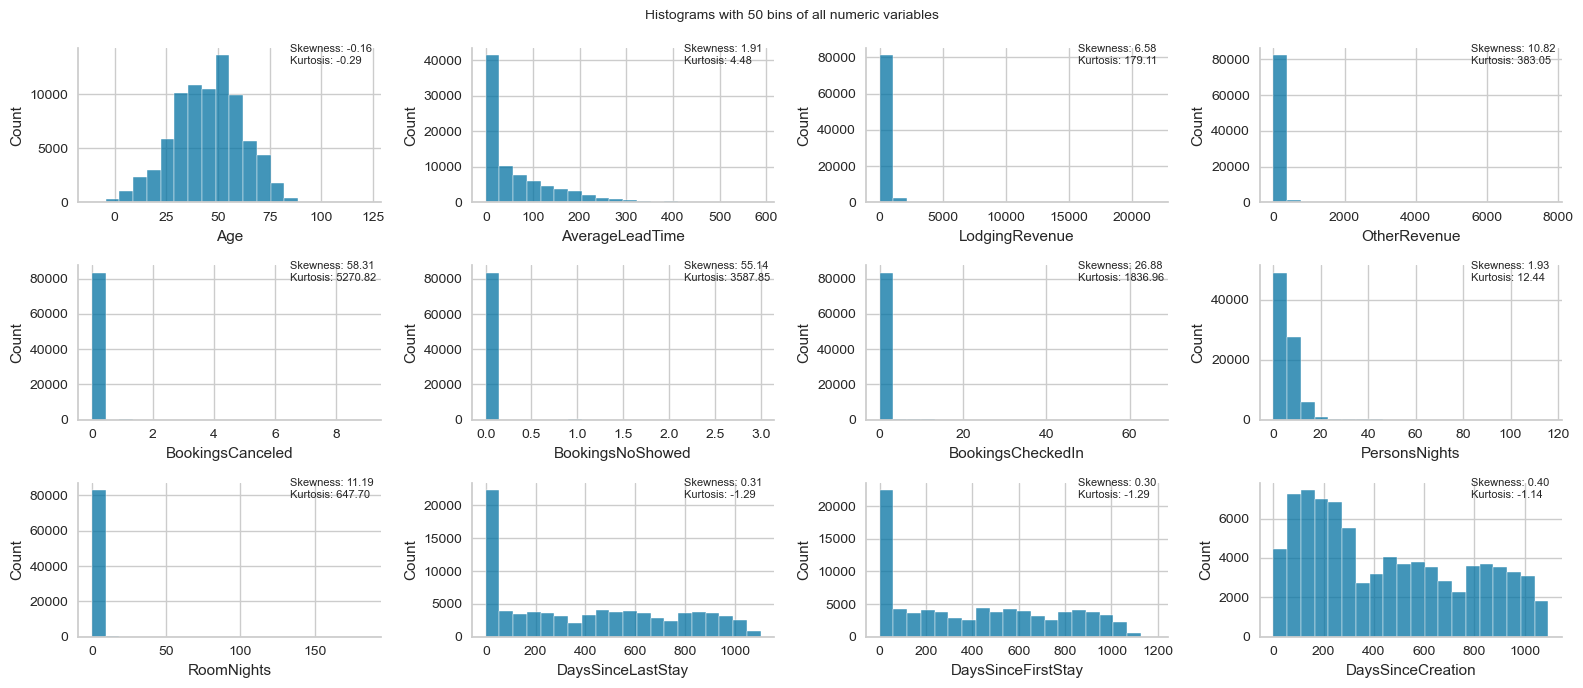

In [32]:
# Create the subplots
fig, ax = plt.subplots(3, 4, figsize=(16, 7))

# Flatten the axes array for easy iteration
ax_flat = ax.flatten()

# Draw the histograms
for i, var in enumerate(numerical_cols):
    sns.histplot(data=ds, bins=20, x=var, ax=ax_flat[i], kde=False)

    # Calculate skewness and kurtosis
    skewness = ds[var].skew()
    kurtosis = ds[var].kurtosis()

    # Annotate skewness and kurtosis
    ax_flat[i].annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', xy=(0.7, 0.9),
                        xycoords='axes fraction', fontsize=8)

# Hide any unused subplots
for i in range(len(numerical_cols), len(ax_flat)):
    fig.delaxes(ax_flat[i])

# Decoration
sns.despine()
plt.rc('axes', labelsize=8)
fig.suptitle("Histograms with 50 bins of all numeric variables", fontsize=10)
plt.tight_layout()
plt.show()

*Findings*:

- Majority of the variables are right-skewed. First it will be considered to apply logaritmic transformation and normalizing to reduce the effect of outliers and not losing much information. Or removing all the outliers. Final decision will be taken based on the results.

#### Distribution of categorical variables <a id="32-dist-cat"></a>

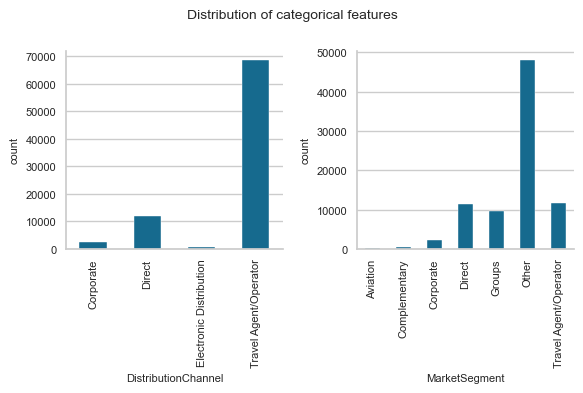

In [33]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# List of columns to plot
columns = ['DistributionChannel', 'MarketSegment']

# Loop to create plots
for ax, col in zip(axes, columns):
    sns.countplot(ax=ax, data=ds, x=col, width=0.5)
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Add a title to the figure
fig.suptitle('Distribution of categorical features', fontsize=10)

# Adjust layout to prevent overlap
sns.despine()
plt.tight_layout()
plt.show()

**Findings:**

- This distribution of `DistributionChannel` highlights the dominance of bookings through Travel Agents/Operators, with Direct bookings also contributing significantly. Corporate bookings represent a smaller but still notable portion, while Electronic Distribution has the fewest bookings among the channels listed.

- The distribution of bookings among various `MarketSegment`, with "Other", "Travel Agent/Operator" and "Direct" segments having the highest number of bookings, while "Complementary" and "Aviation" segments have the lowest number of bookings.

#### Distribution of boolean variables <a id="33-dist-bool"></a>

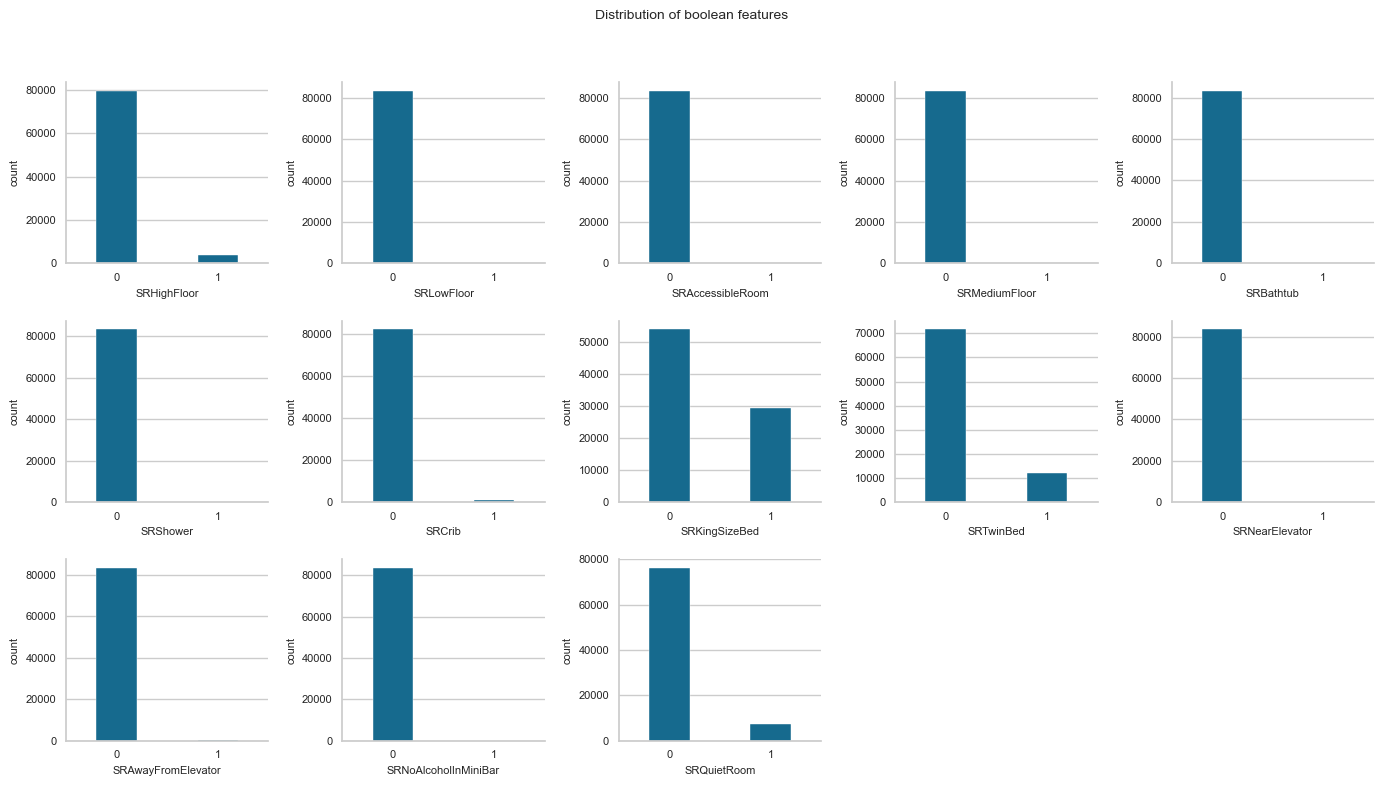

In [34]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 5, figsize=(14, 8))

# Loop to create plots
for ax, col in zip(axes.flat, boolean_cols):
    # Check if the column has any data
    if ds[col].value_counts().sum() == 0:
        ax.axis('off')  # Hide the empty subplot
    else:
        sns.countplot(data=ds, x=col, ax=ax, width=0.4)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

# Hide any remaining empty subplots if there are fewer boolean columns than subplots
for i in range(len(boolean_cols), len(axes.flat)):
    axes.flat[i].axis('off')

# Add a title to the figure
fig.suptitle('Distribution of boolean features', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the title

# Remove the top and right spines after all plots have been created
sns.despine()

plt.show()

*Findings:*
    
**Lower and Middle Floors, Accessible Rooms, and Bathtubs/Shower Preferences**:

- Most customers do not typically request rooms on lower or middle floors, accessible rooms, or rooms with specific bathtub or shower preferences. Since bathrooms are standard in hotel rooms, these distributions are expected to be consistent.

**Preference for High Floors**:

- Despite being a smaller proportion, there is a notable demand for high floors. The desire towards higher floors in hotels is influenced by several factors, including comfort, aesthetics, security, and perceived status.

**Demand for King-Size and Twin Beds**:

- There is a significant demand for rooms with king-size beds and twin beds. Customer preferences for these bed types can vary based on factors such as comfort, sleeping arrangements, health considerations, cultural norms, and availability.

#### Total revenue (€) by top 10 nationality and country group 

In [35]:
# Convert unique values to a list to see all of them
unique_values_list = ds['Nationality'].unique().tolist()

# Print the list
print(unique_values_list)

['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT', 'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE', 'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN', 'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'CYP', 'ARG', 'ARM', 'CHL', 'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY', 'IND', 'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN', 'LBY', 'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER', 'ATF', 'UGA', 'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT', 'IDN', 'UKR', 'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA', 'PHL', 'BHR', 'NAM', 'BOL', 'SGP', 'CMR', 'MLT', 'URY', 'PAK', 'JAM', 'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW', 'LBN', 'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB', 'PYF', 'LIE', 'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA', 'NGA', 'RWA', 'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV', 'MCO', 'MUS', 'SYR', 'TGO', 'LKA', 'SUR', 'KEN', 'MRT', 'HKG', 'CAF', 'NCL', 'STP', 'UZB', 'KIR', 'SDN', 'PRI', 'KNA'

In [36]:
# Group the countries 
country_groups = {
    'EU': ['PRT', 'DEU', 'FRA', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT', 'ITA', 'POL', 'ROU', 'GBR', 'FIN', 'SWE', 'CYP', 
           'DNK', 'NOR', 'LUX', 'CZE', 'AND', 'SVN', 'LTU', 'SRB', 'EST', 'SVK', 'LVA', 'MLT', 'GRC', 'BGR', 'HRV'],
    'Asia': ['JPN', 'CHN', 'RUS', 'TWN', 'KOR', 'IND', 'ISR', 'TUR', 'IRN', 'LBN', 'KAZ', 'KWT', 'IDN', 'ARE', 'BGD', 
             'THA', 'PHL', 'BHR', 'SGP', 'PAK', 'OMN', 'VNM', 'JOR', 'IRQ', 'KIR', 'UZB', 'TJK', 'LAO', 'LKA', 'MMR'],
    'North America': ['USA', 'CAN', 'MEX', 'CRI', 'PAN', 'CUB', 'DOM', 'GTM', 'PRI', 'SLV', 'HTI', 'JAM', 'BRB', 
                      'KNA', 'LCA'],
    'South America': ['BRA', 'ARG', 'CHL', 'COL', 'VEN', 'PER', 'URY', 'BOL', 'PRY', 'ECU'],
    'Africa': ['AGO', 'ZAF', 'MAR', 'MOZ', 'TUN', 'EGY', 'CPV', 'COD', 'DZA', 'GNB', 'UGA', 'AZE', 'MLI', 'NAM', 'CMR', 
               'SYC', 'QAT', 'ABW', 'GAB', 'SEN', 'NGA', 'RWA', 'CIV', 'ALB', 'MNE', 'GHA', 'MDV', 'MUS', 'KEN', 'MRT', 
               'STP', 'COM', 'ETH', 'BEN', 'ZWE', 'BWA', 'ERI', 'GNQ', 'MDG', 'GIN', 'SWZ', 'SOM', 'TGO', 'SDN', 'CAF'],
    'Oceania': ['AUS', 'NZL', 'FJI', 'PYF', 'PNG', 'WLF', 'WSM'],
    'Middle East': ['SAU', 'IRN', 'ISR', 'JOR', 'KWT', 'OMN', 'QAT', 'ARE', 'LBN', 'SYR', 'YEM'],
}
# Create a function to map each country to its broader group
def map_country_to_group(country):
    for group, countries in country_groups.items():
        if country in countries:
            return group
    return 'Other'

# Make a copy of the original dataframe that contains corresponding variables for analysis
rev_by_nationality = ds[['Nationality', 'LodgingRevenue', 'OtherRevenue']].copy()

# Apply the function to create a new column 'CountryGroup'
rev_by_nationality['CountryGroup'] = rev_by_nationality['Nationality'].apply(map_country_to_group)

# Calculate total revenue by country group
rev_by_group = rev_by_nationality.groupby('CountryGroup')[['LodgingRevenue', 'OtherRevenue']].sum()
rev_by_group['TotalRevenue'] = rev_by_group['LodgingRevenue'] + rev_by_group['OtherRevenue']

# Reset index to make 'CountryGroup' a column again
rev_by_group = rev_by_group.reset_index()

# Calculate the total revenue by nationality
rev_by_nationality['TotalRevenue'] = rev_by_nationality['LodgingRevenue'] + rev_by_nationality['OtherRevenue']
rev_by_nationality.drop(['CountryGroup'], axis=1, inplace=True)

# Calculate the total revenue by nationality-top 10
top_10_nationalities = rev_by_nationality.groupby('Nationality', observed=False).sum().sort_values(by='TotalRevenue', ascending=False).head(10)

# Reset index to make 'Nationality' a column again
top_10_nationalities = top_10_nationalities.reset_index()

# Create a bar chart using Altair
bar_chart = alt.Chart(rev_by_group).mark_bar().encode(
    x=alt.X('CountryGroup:N', title='Country Group'),
    y=alt.Y('TotalRevenue:Q', title='Total Revenue'),
    color=alt.Color('CountryGroup:N', legend=alt.Legend(title='Country Group'))
).properties(
    width=350,
    height=400,
    title='Total Revenue (€) by Country Group Bar Chart'
)

# Create a bubble chart using Altair
bubble_chart = alt.Chart(top_10_nationalities).mark_circle().encode(
    x=alt.X('Nationality:N', title='Nationality'),
    y=alt.Y('TotalRevenue:Q', title='Total Revenue'),
    size=alt.Size('TotalRevenue:Q', title='Total Revenue'),
    color=alt.Color('Nationality:N', legend=alt.Legend(title='Nationality'))
).properties(
    width=600,
    height=400,
    title='Total Revenue (€) by Top 10 Nationality Bubble Chart'
)

# Concatenate both charts horizontally
combined_chart = alt.hconcat(bubble_chart, bar_chart)

# Show the combined chart
combined_chart

# @https://altair-viz.github.io

alt.HConcatChart(...)

*Findings*:

**Top Revenue-Generating Nationalities**:
- France (FRA) leads in total revenue, closely followed by Germany (DEU), Portugal (PRT), the United Kingdom (GBR), and Spain (ESP).

**Country group**:
- The EU, North America and Asia regions are major contributors to the total revenue. Other regions also play a role but to a lesser extent compared to these major regions.

#### Average revenue (€) by age group

In [37]:
# Create age groups and total revenue by age groups
age_by_lodging = ds[['Age', 'LodgingRevenue', 'OtherRevenue']].copy()
age_by_lodging['AgeGroups'] = pd.cut(age_by_lodging['Age'], bins=[-1, 20, 30, 40, 50, 60, 160], labels=['<20','20-29','30-39','40-49','50-59','>=60'])
age_by_lodging['AgeGroups'] = age_by_lodging['AgeGroups'].cat.add_categories('Unknown') # Create a unknown age group for missing values
age_by_lodging['AgeGroups'].fillna('Unknown', inplace=True)
age_by_lodging['TotalRevenue'] = age_by_lodging['LodgingRevenue'] + age_by_lodging['OtherRevenue']
age_by_lodging.drop(['Age'], axis=1, inplace=True)

# Calculate average spending
age_by_lodging_avg = age_by_lodging.groupby('AgeGroups', observed=False).mean().reset_index()

# Filter out 'Unknown' age group
age_by_lodging_avg = age_by_lodging_avg[age_by_lodging_avg['AgeGroups'] != 'Unknown'] # Hide the unknown age group in the graph

# Melt the DataFrame to long format for Altair
age_by_lodging_avg_melt = pd.melt(age_by_lodging_avg, id_vars='AgeGroups', var_name='RevenueType', value_name='AverageRevenue')

# Plotting using Altair
chart = alt.Chart(age_by_lodging_avg_melt).mark_bar().encode(
    x='AgeGroups:O',
    y='AverageRevenue:Q',
    color='RevenueType:N',
    column='RevenueType:N'
).properties(
    width=300,
    height=300
)

chart


alt.Chart(...)

*Findings*:

- The "40-49" and "50-59" age groups generate the highest lodging and total revenue.
- The ">=60" age group has the highest other revenue.
- The "<20" age group consistently shows the lowest revenue across all categories.

### 4. Data Preparation

In [38]:
# Create a modeling dataset from the original dataset to prevent data leakage. Apply data cleaning and preprocessing on the copied version
X = ds.copy(deep=True)

#### Handling negative values in `Age` column

In [39]:
# Remove the negative values and and keep the missing values for imputation
X = X[(X['Age'] >= 0) | pd.isnull(X['Age'])]
print(X.shape[0])

83573


#### Handling negative values in `AverageLeadTime` column

In [40]:
X = X[X['AverageLeadTime'] >= 0]
print(X.shape[0])

83563


#### Weighted missing value imputation for `Age` column

In [41]:
# Frequincies before imputation
print(X.Age.value_counts())
print("Mean before imputation:", X.Age.mean())
print("Median before imputation:", X.Age.median())

# Set a random seed for reproducibility
np.random.seed(10)

# Calculate the weights based on value frequencies
weights = X['Age'].value_counts(normalize=True)

# Create a mask for missing values in the 'Age' column
mask = X['Age'].isnull()

# Generate imputations based on weights
imputations = np.random.choice(weights.index, size=mask.sum(), p=weights)

# Update the missing values in the original DataFrame
X.loc[mask, 'Age'] = imputations

# Frequincies after imputation
print(X.Age.value_counts())
print("Mean after imputation:", X.Age.mean())
print("Median after imputation:", X.Age.median())

Age
50.0     2034
51.0     2031
54.0     1981
53.0     1938
49.0     1886
         ... 
91.0        1
110.0       1
122.0       1
96.0        1
109.0       1
Name: count, Length: 99, dtype: int64
Mean before imputation: 45.409061853731906
Median before imputation: 46.0
Age
50.0     2149
51.0     2143
54.0     2076
53.0     2029
49.0     1984
         ... 
109.0       2
91.0        1
110.0       1
122.0       1
96.0        1
Name: count, Length: 99, dtype: int64
Mean after imputation: 45.415554731160924
Median after imputation: 46.0


#### Remove the rows where the combination of `NameHash` and `DocIDHash` is duplicated and drop the columns

In [42]:
# Remove all the rows that have the same 'NameHash' and 'DocIDHash'
X.drop_duplicates(subset=["NameHash","DocIDHash"], keep=False, inplace=True)

# After removing the duplicated rows, drop the columns since that is not valuable for segmentation
X.drop(['ID', 'NameHash', 'DocIDHash'], axis=1, inplace=True)

#### Remove the customers never checkedIn

In [43]:
# Only get the customers checkedIn
X = X[X['BookingsCheckedIn'] > 0]

# Drop 'BookingsCheckedIn' column
X.drop(['BookingsCheckedIn'], axis=1, inplace=True)

#### Drop the outdated and no variance columns


In [44]:
# Drop the outdated and no variance columns
X.drop(['BookingsCanceled', 'BookingsNoShowed', 'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRQuietRoom',
        'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
        'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar'], axis=1, inplace=True)

#### Outliers Detection

Outliers in 'Age':
3282     114.0
18910    110.0
24609    109.0
44518    113.0
45082    114.0
62677     96.0
Name: Age, dtype: float64

Outliers in 'AverageLeadTime':
10663    292
10664    292
10665    292
10666    292
10667    292
        ... 
83211    316
83218    338
83221    338
83309    298
83463    320
Name: AverageLeadTime, Length: 2395, dtype: int64

Outliers in 'DaysSinceCreation':
Series([], Name: DaysSinceCreation, dtype: int64)

Outliers in 'LodgingRevenue':
378      1086.0
669      1132.0
808      1695.9
988      1660.0
1633     1095.0
          ...  
83504    2235.9
83517    1723.8
83529    1101.0
83531    1101.0
83537    1047.3
Name: LodgingRevenue, Length: 3114, dtype: float64

Outliers in 'OtherRevenue':
66        284.97
71        292.50
73        301.50
75        623.10
76       1189.20
          ...   
83471    1139.50
83511     446.50
83545     374.50
83560     288.00
83586     277.50
Name: OtherRevenue, Length: 3942, dtype: float64

Outliers in 'PersonsNights':
116

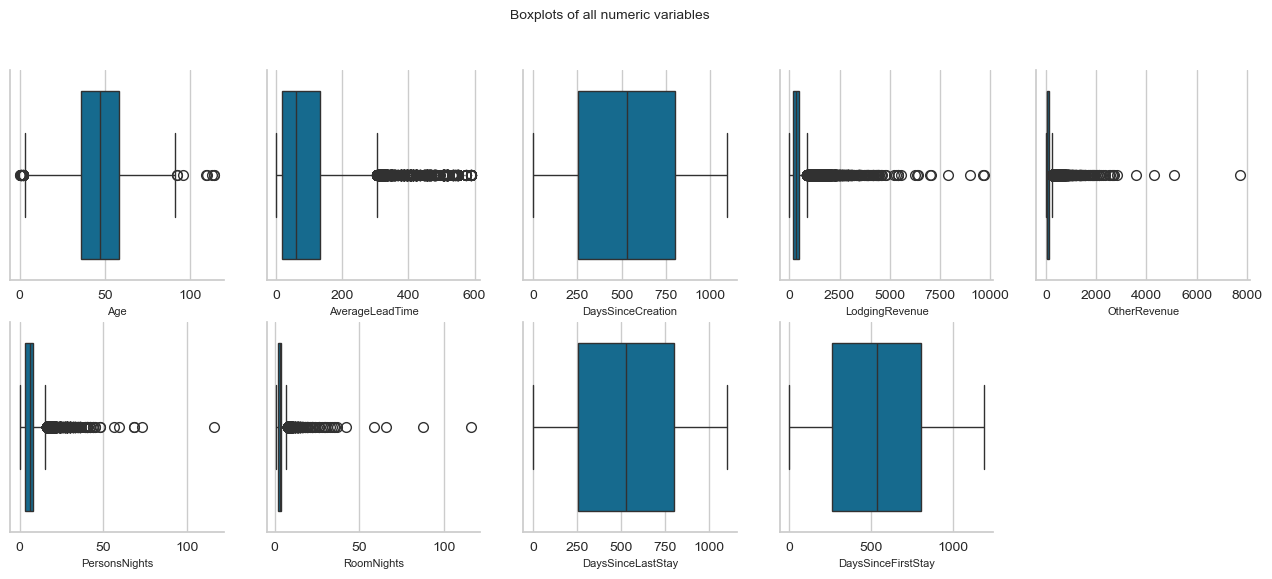

In [45]:
# Assign the columns
prep_numerical_var = ['Age', 'AverageLeadTime', 'DaysSinceCreation', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay']

# Draw
fig, ax = plt.subplots(2, 5, figsize=(16, 6))
for var, subplot in zip(X[prep_numerical_var], ax.flatten()):
    sns.boxplot(data=X, x=var, ax=subplot)

# Hide empty subplots
for i in range(len(prep_numerical_var), len(ax.flatten())):
    fig.delaxes(ax.flatten()[i])

# Decoration
sns.despine()
plt.rc('axes', labelsize=8)
fig.suptitle("Boxplots of all numeric variables", fontsize=10)

# Printing outlier values can help the filter exact points. We may need to filter outliers based on the distribution.
for var in X[prep_numerical_var]:
    outliers = X[var][X[var] > X[var].quantile(0.75) + 1.5 * (ds[var].quantile(0.75) - ds[var].quantile(0.25))]
    print(f"Outliers in '{var}':\n{outliers}\n")  # Click text editor below (VScode) to check all outlier values

plt.show()

# Save to file
# fig.savefig('MultipleBoxplots.svg', bbox_inches="tight")

**Findings**:

- Although we see data points above and below the fences, not all of them are outliers since they are grouped together. Only a small number of data points that are significantly distant from the majority group are considered outliers.

- Each data point represents a customer. For instance, in the Other Revenue boxplot, there is a data point above 6000. The significant distance between this customer and the others indicates that this is an outlier.

- In this case, we will move case by case. We will filter those distant point instead of determine a outlier range.

#### Remove the the outliers

In [46]:
for col in prep_numerical_var:
    Q1 = X[col].quantile(0.25)  # First quartile
    Q3 = X[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep only the rows where the values fall within the bounds for the specified column
    X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]

#### Create a new variable `TotalRevenue`

In [47]:
# Create a new variable 'TotalRevenue' by summing 'LodgingRevenue' and 'OtherRevenue'
X['TotalRevenue'] = X['LodgingRevenue'] + X['OtherRevenue']

# Drop the columns after creating new variable
X.drop(['LodgingRevenue', 'OtherRevenue'], axis=1, inplace=True)

#### Remove the customers with zero revenue

In [48]:
# Count the number of rows where TotalRevenue is zero
num_zero_revenue = X[X['TotalRevenue'] == 0].shape[0]

print(f"The number of rows with total revenue equal to zero is: {num_zero_revenue}")

# Remove the rows where 'TotalRevenue' is equal to 0
X = X[X['TotalRevenue'] != 0]
print("Removed finely!")

The number of rows with total revenue equal to zero is: 225
Removed finely!


#### Create bins for `Age` column

In [49]:
# Bin the age with adjusted bin ranges
X['age_bins'] = pd.cut(x=X['Age'], bins=[-1, 20, 30, 40, 50, 60, 100], labels=['<20','20-29','30-39','40-49','50-59','>=60'])

# Drop the age column
X.drop(columns='Age', inplace=True)

# Check the unique values for 'age_bins'
X['age_bins'].unique()

['50-59', '>=60', '30-39', '20-29', '40-49', '<20']
Categories (6, object): ['<20' < '20-29' < '30-39' < '40-49' < '50-59' < '>=60']

#### One hot encoding for categorical variables with thresholding

In [50]:
# One hot encoding of all categories above 10% - all others categories to "Other"
cols = ['Nationality', 'age_bins', 'DistributionChannel']
for i in range(len(cols)):
    colToProcess = X[cols[i]].astype(str)
    procDF = one_hot(colToProcess, .10,cols[i]+'_')
    X.drop(columns=cols[i], inplace=True)
    X = pd.concat([X, procDF], axis=1)

#### Pearson correlation matrix

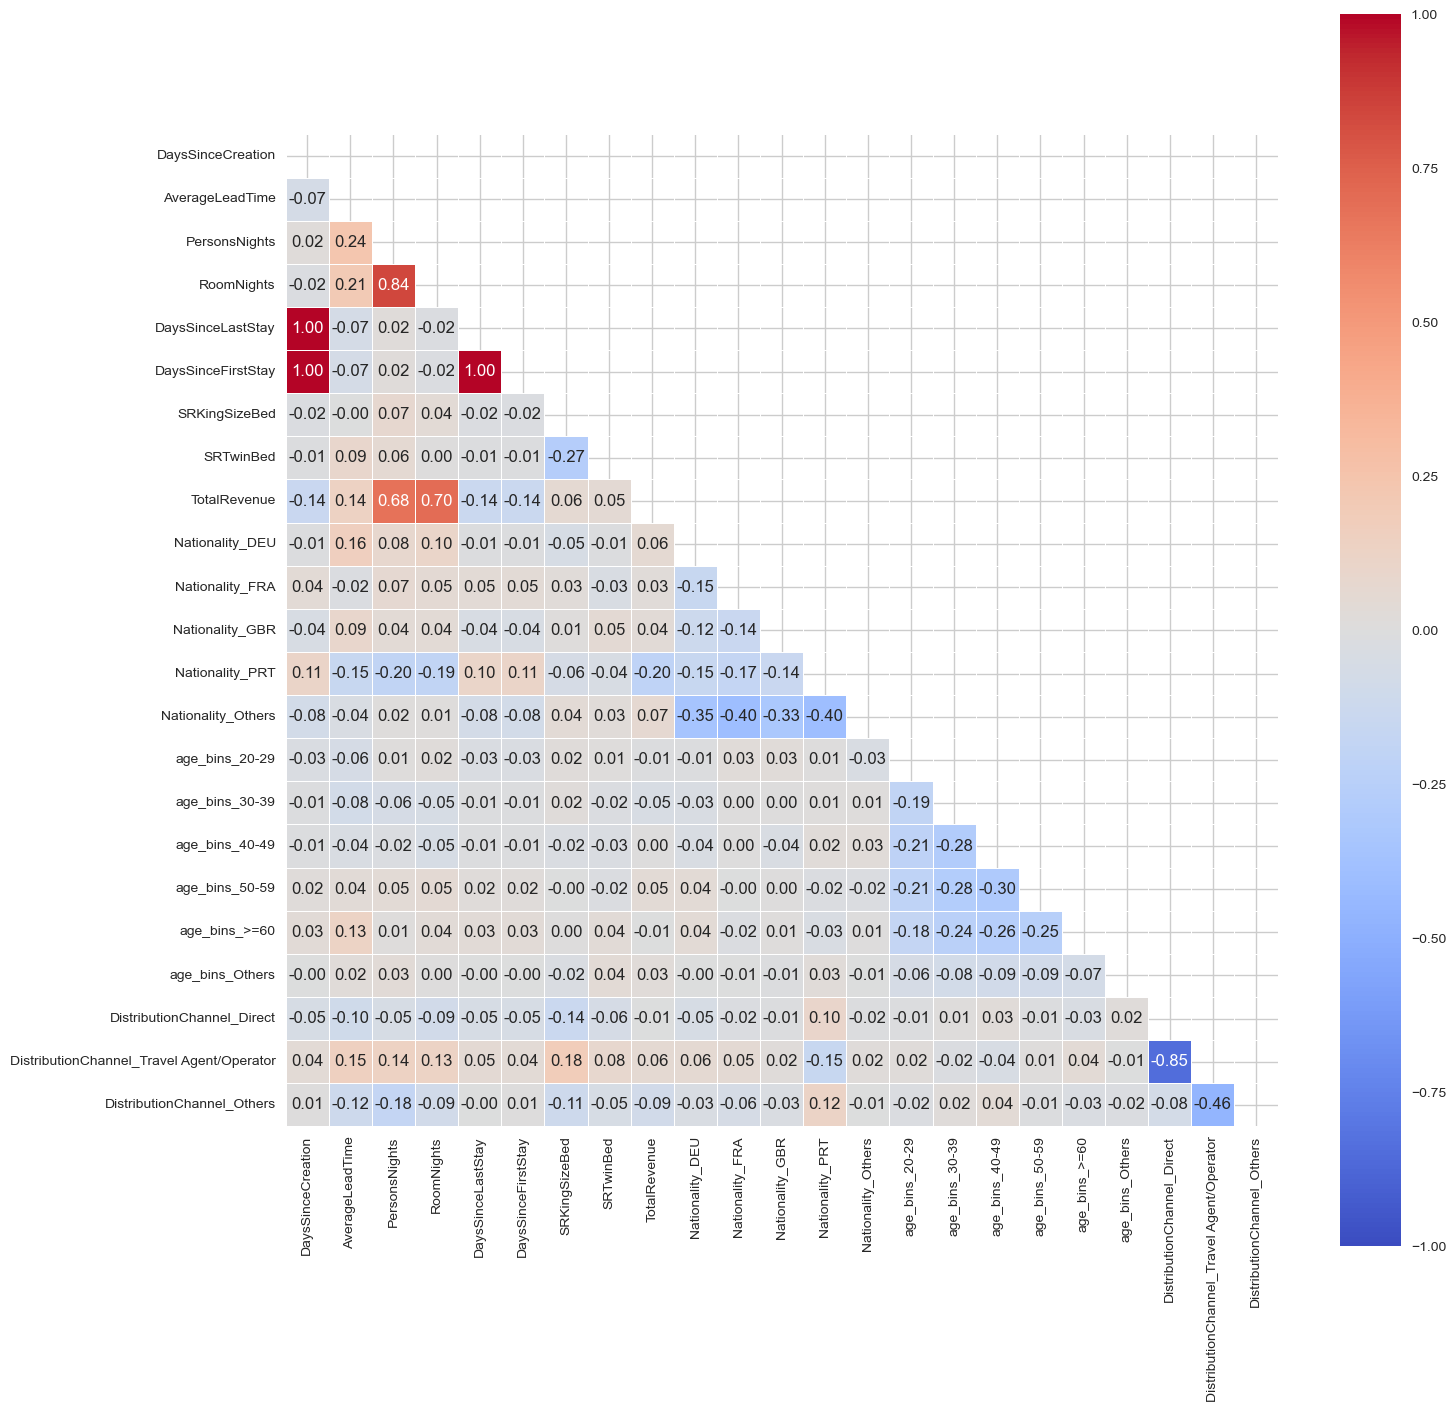

In [51]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the size of the figure
plt.figure(figsize=(16, 16))

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask,
                square=True,
                linewidths=.5,
                vmin=-1,
                vmax=1,
                annot=True,
                fmt=".2f")
plt.show()

- When the correlation between different columns is exactly 1.00, it means that those columns are perfectly linearly correlated. 
- In other words, one column is a constant multiple of the other. In a clustering task, having perfectly correlated columns can potentially cause issues because it doesn't add any new information to the analysis. Clustering algorithms may interpret these perfectly correlated columns as redundant features, which could affect the performance of the clustering algorithm. 
- Therefore, it's generally a good practice to remove one of the perfectly correlated columns before applying a clustering algorithm. This helps in reducing redundancy and can lead to more meaningful clusters.

#### Drop highly correlated variables

In [52]:
# Drop highly correlated variables
X.drop(['RoomNights', 'DaysSinceFirstStay', 'DaysSinceCreation', 'DaysSinceLastStay', 'DistributionChannel_Direct'], axis=1, inplace=True)

In [53]:
# Get a copy of the dataframe before normalization for results' analysis
X_beforeNorm = X.copy(deep=True)

#### Normalization

In [54]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.values), columns=X.columns, index=X.index)

#### Dendogram 

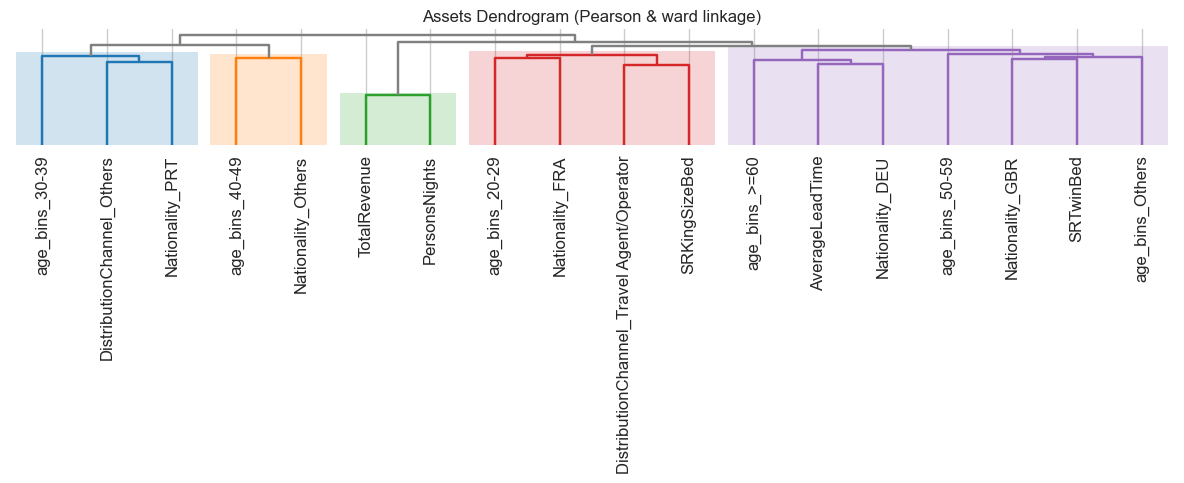

In [55]:
# Plot the dendogram
fig, ax = plt.subplots(figsize=(10,10))
dg = rp.plot_dendrogram(returns=X,
                               codependence='pearson',
                               linkage='ward',
                               k=None,
                               max_k=10,
                               leaf_order=True)

#### Summary statistics - after data preparation

In [56]:
# Check dataframe structure and statistics after all transformations
print(X.shape)
X.describe(include='all').T

(50264, 18)


,count,mean,std,min,25%,50%,75%,max
AverageLeadTime,50264.0,0.253724,0.239975,0.0,0.052459,0.180328,0.396721,1.0
PersonsNights,50264.0,0.363469,0.211763,0.0,0.200000,0.400000,0.533333,1.0
SRKingSizeBed,50264.0,0.346650,0.475908,0.0,0.000000,0.000000,1.000000,1.0
SRTwinBed,50264.0,0.130352,0.336693,0.0,0.000000,0.000000,0.000000,1.0
TotalRevenue,50264.0,0.338901,0.181055,0.0,0.201183,0.315885,0.444242,1.0
Nationality_DEU,50264.0,0.118992,0.323782,0.0,0.000000,0.000000,0.000000,1.0
Nationality_FRA,50264.0,0.147660,0.354767,0.0,0.000000,0.000000,0.000000,1.0
Nationality_GBR,50264.0,0.102738,0.303619,0.0,0.000000,0.000000,0.000000,1.0
Nationality_PRT,50264.0,0.148377,0.355476,0.0,0.000000,0.000000,0.000000,1.0
Nationality_Others,50264.0,0.482234,0.499689,0.0,0.000000,0.000000,1.000000,1.0


#### PCA variance analysis

In [57]:
# Fit the PCA algorithm to data
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.147610,0.147610
1,2,0.117991,0.265601
2,3,0.108047,0.373649
3,4,0.099991,0.473640
4,5,0.091403,0.565042
5,6,0.077373,0.642415
6,7,0.065239,0.707654
7,8,0.062920,0.770574
8,9,0.055717,0.826291
9,10,0.051029,0.877320


*Findings*:

- The first principal component explains approximately 14.76% of the variance in the data.
- As we move to subsequent components, the variance explained decreases, with the second component explaining about 11.79% of the variance.
- The cumulative variance explained steadily increases with each additional component, reaching 100% by the 16th component.
- The last two components (components 17 and 18) do not contribute to the cumulative variance explained, as their variance explained values are 0.

#### Cumulative explained variance 

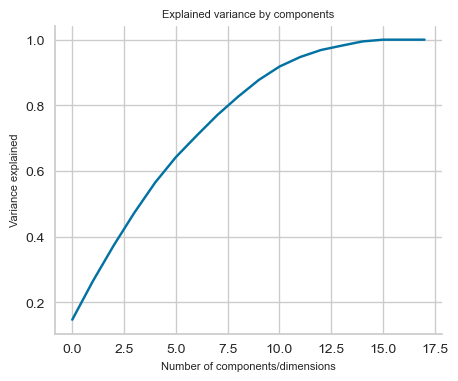

In [58]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=8)
plt.title('Explained variance by components', fontsize=8)
plt.show()

- We have decided to choose 13 components that collectively explain 96% of the cumulative variance. This decision strikes a balance between preserving information and reducing dimensionality.

In [59]:
# Apply the dimension reduction to the dataset (for 13 components)
pca_reduced = PCA(n_components = 13)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X)
print(X_pca_reduced.shape)

(50264, 13)


#### Elbow Method

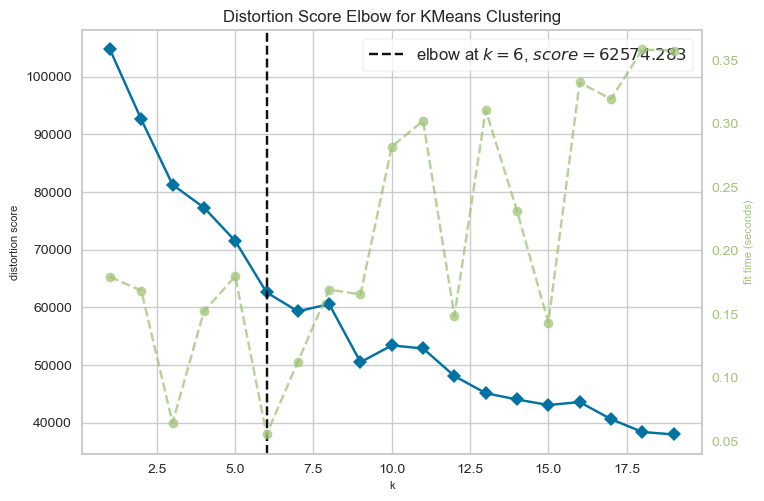

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show()

#### Silhouette method

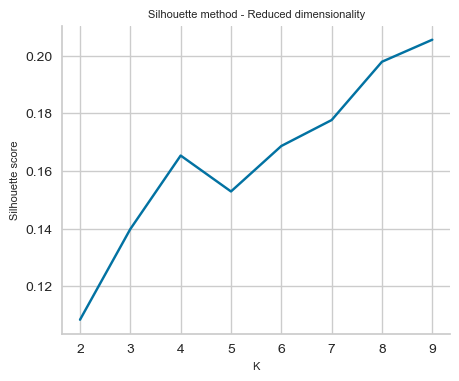

In [61]:
# Select K based on the Silhouette method
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=123).fit(X)
    labels = km.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

# Show Results

# Draw
fig, ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 10), sil, 'bx-')

# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=8)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=8)

plt.show()

In [62]:
# Apply the K-Means for K=3
K=3
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

Although the Elbow Method suggests 6 clusters based on the distortion score and the Silhouette method suggests 9 clusters, we prefer to go with 3 clusters, here's why: 

- Firstly, having fewer clusters makes it easier to interpret the results. 
- Secondly, we are worried about overfitting if we have too many clusters, so keeping it simple with 3 seems like a safer bet. 
- Thirdly, it'll be more computationally efficient. So, while the Elbow Method gives us one perspective, there are other factors to consider in making the final decision.

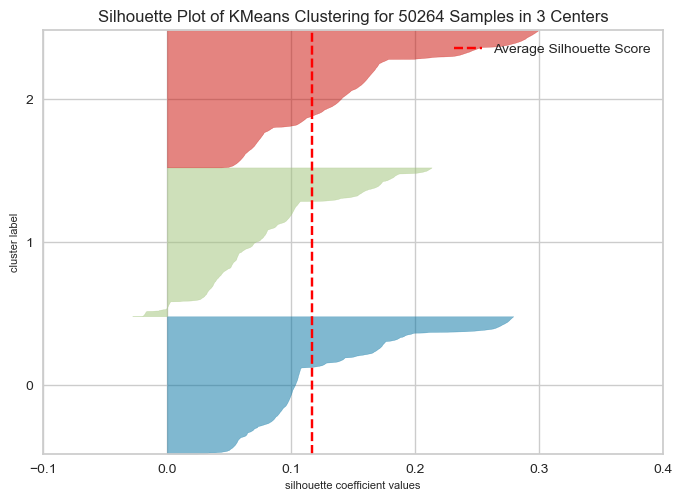

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50264 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()

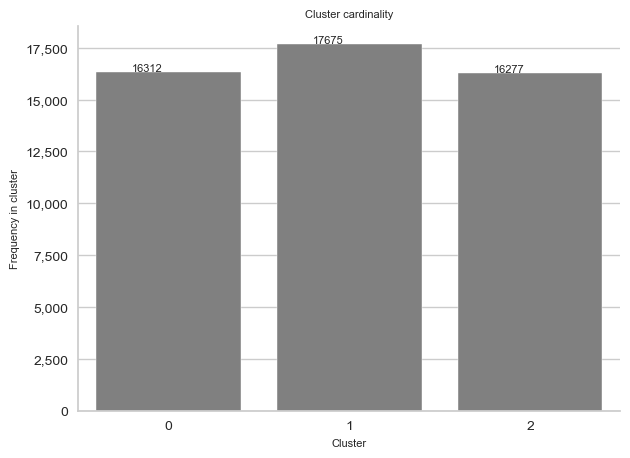

In [64]:
# Plot clusters cardinality

# Count observations per cluster
freqByCluster = X_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=8))
sns.despine()
plt.title("Cluster cardinality", fontsize=8)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=8)

- The results show that observations are spread out evenly among clusters. Class 1 has the most, followed closely by class 0, and then class 2. This suggests that each cluster has about the same number of observations.

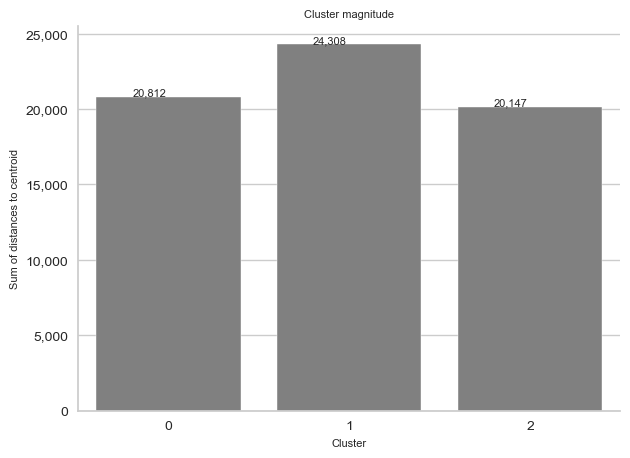

In [65]:
# Plot clusters magnitude

# Compute Magnitude
X['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = X['distanceToCentroid'].groupby(y_kmeans).sum()
X = X.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=8))
sns.despine()
plt.title("Cluster magnitude", fontsize=8)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=8)

- The results show that each cluster has a different spread of data points from its center. Class 1 has the widest spread, followed by class 2, and then class 0. This variation suggests that each cluster captures a distinct pattern in the data. 

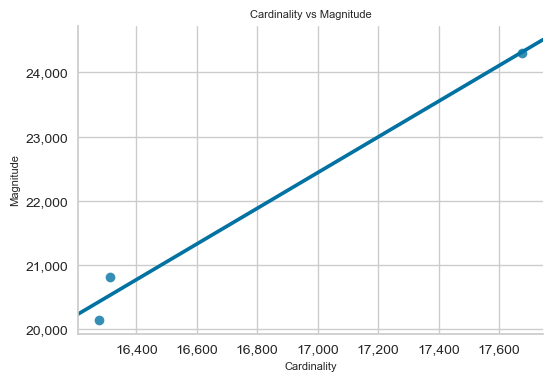

In [66]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=8)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=8)

- Cardinality and magnitude have a positive correlation. This indicates that clusters with more varied observations will likely have greater overall distances from their centroid.

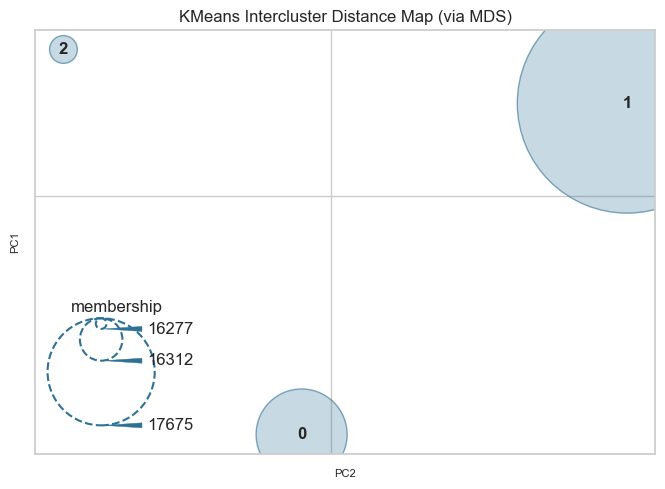

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [67]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()

In [68]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,AverageLeadTime,PersonsNights,SRKingSizeBed,SRTwinBed,TotalRevenue,Nationality_DEU,Nationality_FRA,Nationality_GBR,Nationality_PRT,Nationality_Others,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,age_bins_>=60,age_bins_Others,DistributionChannel_Travel Agent/Operator,DistributionChannel_Others
0,-7.704433e-03,1.844137e-02,1.509153e-01,1.921296e-03,3.093814e-02,-0.187774,-0.257029,-0.144228,-0.284706,0.873737,-0.028847,0.015842,0.051197,-0.046619,0.011534,-0.003108,5.461001e-02,-1.625192e-02
1,3.780479e-02,6.526756e-02,8.248033e-01,-2.198925e-01,3.728515e-02,0.036210,0.130858,0.053663,-0.103083,-0.117648,0.039566,0.068784,-0.301340,0.153929,0.046645,-0.007583,2.928683e-01,-9.840784e-02
2,-5.615276e-02,-2.744433e-02,3.233489e-01,-1.445642e-01,-1.921947e-02,-0.069856,0.076639,-0.009432,0.092365,-0.089716,0.007607,0.031932,0.666399,-0.625979,-0.075128,-0.004832,-1.010381e-02,7.984174e-03
3,-4.952097e-02,-5.317970e-02,-8.171453e-02,3.850369e-02,-4.167677e-02,-0.049779,-0.028199,0.010936,0.057707,0.009334,0.046409,0.736483,-0.435906,-0.473028,0.120921,0.005121,-6.711060e-02,2.306335e-02
4,1.568517e-01,8.018025e-02,-1.014424e-01,1.891813e-01,4.419683e-02,0.142863,0.037716,0.065629,-0.211631,-0.034577,0.067913,-0.347193,-0.086683,-0.353937,0.712172,0.007730,2.730911e-01,-9.510405e-02
5,-1.089909e-01,-1.430371e-01,2.009084e-01,-2.587539e-01,-9.848671e-02,-0.119965,-0.337721,-0.068255,0.489914,0.036027,0.027583,-0.254605,-0.162494,-0.000101,0.388637,0.000980,-4.560101e-01,1.589050e-01
6,-1.136223e-01,-9.346879e-03,-3.352974e-02,3.269787e-02,-1.342034e-02,-0.290330,0.292211,-0.032545,-0.026744,0.057408,0.796264,-0.254339,-0.198296,-0.145065,-0.211826,0.013262,-7.452574e-02,1.380420e-02
7,-6.106507e-02,-8.046593e-03,-3.940505e-02,-1.924175e-01,8.663001e-03,-0.290175,0.686120,-0.195098,-0.247019,0.046171,-0.327558,0.020728,-0.004735,0.074783,0.249596,-0.012814,-3.421760e-01,9.215587e-02
8,6.829253e-02,6.974421e-02,1.747597e-02,-3.065466e-01,7.972232e-02,0.572020,-0.124833,0.084120,-0.498862,-0.032446,0.182488,-0.005008,-0.017624,-0.080004,-0.070713,-0.009139,-4.766420e-01,1.332246e-01
9,5.199171e-02,4.161672e-02,1.026333e-01,2.176627e-01,5.309898e-02,-0.411598,-0.118906,0.797486,-0.201994,-0.064988,-0.077181,-0.000411,0.033284,0.030654,0.016691,-0.003037,-2.417094e-01,5.965417e-02


In [69]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[15])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

TotalRevenue                                 0.768586
PersonsNights                                0.634155
AverageLeadTime                              0.059674
DistributionChannel_Others                   0.051881
DistributionChannel_Travel Agent/Operator    0.015525
Nationality_PRT                              0.013754
age_bins_20-29                               0.011089
Nationality_Others                           0.009618
Nationality_GBR                              0.008520
Nationality_FRA                              0.008287
SRTwinBed                                    0.004792
age_bins_40-49                               0.004728
Nationality_DEU                              0.003902
age_bins_Others                              0.003573
SRKingSizeBed                                0.002353
age_bins_50-59                               0.002132
age_bins_30-39                               0.000916
age_bins_>=60                                0.000261
Name: 15, dtype: float64

In [70]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF = clustersMeanDF.reindex(sorted(clustersMeanDF.columns), axis=1)
clustersMeanDF.transpose()

,0,1,2
AverageLeadTime,71.228237,78.252560,82.615470
DistributionChannel_Others,0.031449,0.051542,0.037599
DistributionChannel_Travel Agent/Operator,0.871996,0.803395,0.835719
Nationality_DEU,0.094041,0.157058,0.102660
Nationality_FRA,0.036783,0.290467,0.103705
Nationality_GBR,0.112249,0.120509,0.073908
Nationality_Others,0.617030,0.227496,0.623764
Nationality_PRT,0.139897,0.204470,0.095964
PersonsNights,5.349068,5.359943,5.655219
SRKingSizeBed,0.658718,0.155361,0.241629


**Cluster 0: Young King-Sizers**

- Average Lead Time: 71.23 days (shortest).
- Distribution Channel: Highest preference for "Travel Agent/Operator".
- Nationality: Higher representation of Portuguese (PRT) nationals.
- Room Type: Prefer King Size Beds.
- Age: Predominantly aged 30-39.

**Cluster 1: Middle-Aged Twin-Bedders**

- Average Lead Time: 78.25 days.
- Distribution Channel: Strong preference for "Travel Agent/Operator".
- Nationality: Higher prevalence of German (DEU) and French (FRA) nationals.
- Room Type: Prefer Twin Beds.
- Age: Predominantly aged 40-49.

**Cluster 2: Senior Balanced Preferences**

- Average Lead Time: 82.62 days (longest).
- Nationality: Highest percentage of "Others".
- Room Type: Balanced preference between King Size and Twin Beds.
- Age: Predominantly aged 50-59, followed by those aged 60 and above.